# DataJam 2022 - QGis Warriors
Integrantes
- Jácome José
- Parra Karen
- Vasco Danny
## Descripción
Este Jupyter Notebook está dirigido a limpiar datos de un archivo csv que contienen valores de celdas incorrectas

## Objetivo
- Eliminar los datos con valores na
- Corregir datos que no son legibles por los humanos

## Sección de Carga de Librerías y Constantes

In [95]:
#Codigo para crear una lista del diccionario que nos dan
import pandas as pd
import numpy as np
RUTA_ARCHIVO_CSV = 'BD_Diccionario.csv'
RUTA_EJERCICIO_CSV = 'BD_Limpieza_Ejercicio.csv'

## Exploracion de Datos
La función `head()` muestra en el Notebook las primeras cinco filas del archivo
- Diccionario

In [96]:
df_diccionario = pd.read_csv(RUTA_ARCHIVO_CSV, sep=";")
df_ejercicio = pd.read_csv(RUTA_EJERCICIO_CSV, sep=";")
df_ejercicio = df_ejercicio.replace('NAN', np.nan)
df_diccionario.head()

,Nombre,Etiqueta,Medida
0,ANIO_CREACION,Año de creación del área de protección hídrica,Escala
1,REG_NAT,Región Natural del país,Nominal
2,DEMAR_HIDRO,Demarcación Hidrográfica a la que pertenece el...,Nominal
3,DIR_ZON,Dirección Zonal a la que pertenece el área de ...,Nominal
4,DPA_PROVIN,Código de la provincia según codificación geog...,Ordinal


- Ejercicio

In [81]:
df_ejercicio.head()

,ANIO_CREACION,REG_NAT,AREA_PROTEC,DEMAR_HIDRO,DIR_ZON,DPA_PROVIN,DPA_DESPRO,DPA_CANTON,DPA_DESCAN,DPA_PARROQ,DPA_DESPAR,AREA,NAM,EDEL,SUP_HA,Unnamed: 15
0,2021.0,REGIÓN SIERRA O INTERANDIN@,NaN,DEMARCACIàN HIDROGRµFICA PASTAZA,DIRECCIÓN ZONAL CHIMBORAZO,5,COTOPAXI,0501,LATACUNGA,050150,LATACUNGA,URBANO,SANTA ELENA,CONCLUIDO,"166,498875",NaN
1,2021.0,REGIÓN SIERRA O INTERANDIN@,NaN,DEMARCACIàN HIDROGRµFICA GUAYAS,DIRECCIÓN ZONAL GUAYAS,2,BOLÖVAR,0201,GUARANDA,020157,SAN SIMÓN,RURAL,SAN SIMÓN DE QUINLLUNGA-GUARANDA,CONCLUIDO,"556,577508",NaN
2,2021.0,REGIÓN SIERRA O INTERANDIN@,NaN,DEMARCACIàN HIDROGRµFICA PASTAZA,DIRECCIÓN ZONAL CHIMBORAZO,NaN,TUNGURAHuA,1806,QUERO,180650,QUERO,URBANO,TELIGOTE,CONCLUIDO,"1,825835",NaN
3,2021.0,REGIÓN SIERRA O INTERANDIN@,NaN,DEMARCACIàN HIDROGRµFICA PASTAZA,DIRECCIÓN ZONAL CHIMBORAZO,18,TUNGURAHUA,1807,SAN PEDRO DE PELILEO,180750,PELILEO,URBANO,TELIGOTE,CONCLUIDO,"193,884743",NaN
4,2021.0,REGIÓN SIERRA O INTERANDIN@,NaN,DEMARCACIàN HIDROGRµFICA PASTAZA,DIRECCIÓN ZONAL CHIMBORAZO,18,TUNGURAUA,1807,SAN PEDRO DE PELILEO,180752,BOLÍVAR,RURAL,TELIGOTE,CONCLUIDO,"2,391932",NaN


## Exploración visual de los datos
Explora los datos visualmente para poder conocer las características del conjunto de datos

<AxesSubplot:title={'center':'Valores columna DPA_DESCAN'}>

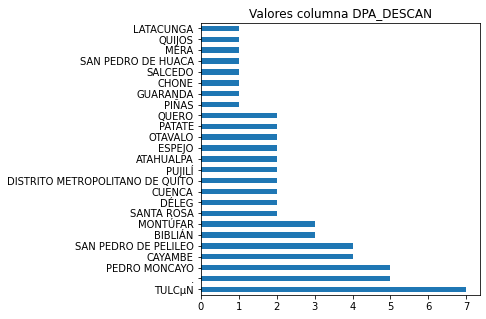

In [97]:
# NOMBRE_COLUMNA_EXPLORAR = "ANIO_CREACION" Ejemplo 1
NOMBRE_COLUMNA_EXPLORAR = "DPA_DESCAN"
 
df_ejercicio[NOMBRE_COLUMNA_EXPLORAR].value_counts().plot.barh(figsize = (5, 5), title=f"Valores columna {NOMBRE_COLUMNA_EXPLORAR}")

## Explorar nombres de valores de cada columna
Muestra todos los valores que hay en una columna para poder reconocer los valores defectuosos

In [98]:
for columna in df_ejercicio.columns:
    print(f"======================= Exploracion Valores Columna: {columna} =======================")
    lista_valores_celda = df_ejercicio[columna].value_counts().index.values.tolist()
    print(' ,'.join(map(str, lista_valores_celda))) # Imprimir values en una sola linea

======================= Exploracion Valores Columna: ANIO_CREACION =======================
2021.0 ,2019.0 ,2020.0 ,2018.0
======================= Exploracion Valores Columna: REG_NAT =======================
REGIÓN SIERRA O INTERANDIN@ ,REGIÓN SIERRA O INTERAnNDINA ,. ,REGIÓN COSTA O LITORAL ,REGIÓN COTA O LITORAL ,REGIÓN ORIENTAL O AMAZÓNICA ,REGIÓN SIERRA O INTERANDINA
======================= Exploracion Valores Columna: AREA_PROTEC =======================
. ,SI ,NO
======================= Exploracion Valores Columna: DEMAR_HIDRO =======================
DEMARCACIàN HIDROGRµFICA MIRA ,DEMARCACIàN HIDROGRµFICA PASTAZA ,DEMARCACIàN HIDROGRµFICA ESMERALDAS ,DEMARCACIàN HIDROGRµFICA SANTIAGO ,DEMARCACIàN HIDROGRµFICA JUBONES ,. ,DEMARCACIàN HIDROGRµFICA GUAYAS ,DEMARCACIàN HIDROGRµFICA MANABÍ ,999
======================= Exploracion Valores Columna: DIR_ZON =======================
DIRECCIÓN ZONAL IMBABURA ,DIRECCIÓN ZONAL CHIMBORAZO ,DIRECCIÓN ZONAL ESMERALDAS ,DIRECCIÓN ZONAL AZUAY ,DIREC

## Identificacion de valores nullos
A través de la exploración a través de pandas, se evalua por valores nulos

In [99]:
print("Impresion de Valores: Nulo")
print(df_ejercicio.isnull().sum()) #Me permite comprobar que el reemplazo se hizo correctamente, deberia tener valores TRUE :(
print("Impresion de Valores: No hay")
print(df_ejercicio.isna().sum())

Impresion de Valores: Nulo
ANIO_CREACION     9
REG_NAT           7
AREA_PROTEC      61
DEMAR_HIDRO       9
DIR_ZON           9
DPA_PROVIN       11
DPA_DESPRO        9
DPA_CANTON        9
DPA_DESCAN        9
DPA_PARROQ        9
DPA_DESPAR        9
AREA              9
NAM               9
EDEL              9
SUP_HA            9
Unnamed: 15      68
dtype: int64
Impresion de Valores: No hay
ANIO_CREACION     9
REG_NAT           7
AREA_PROTEC      61
DEMAR_HIDRO       9
DIR_ZON           9
DPA_PROVIN       11
DPA_DESPRO        9
DPA_CANTON        9
DPA_DESCAN        9
DPA_PARROQ        9
DPA_DESPAR        9
AREA              9
NAM               9
EDEL              9
SUP_HA            9
Unnamed: 15      68
dtype: int64


# Limpieza de datos
En esta sección los datos van a ser modificados de acuerdo a las necesidades del dataset, se empieza con eliminar los datos que no estan en el diccionario inicial
## Limpieza de columnas que no están en los diccionarios

In [100]:
lista_nombres_columnas = df_diccionario['Nombre'].tolist()
#print(lista_nombres_columnas)
#Codigo para comparar los encabezados de la tabla con la lista del diccionario

df_ejercicio_filtrado = pd.DataFrame(df_ejercicio, columns=lista_nombres_columnas)
df_ejercicio_filtrado.head()

,ANIO_CREACION,REG_NAT,DEMAR_HIDRO,DIR_ZON,DPA_PROVIN,DPA_DESPRO,DPA_CANTON,DPA_DESCAN,DPA_PARROQ,DPA_DESPAR,AREA,NAM,EDEL,SUP_HA
0,2021.0,REGIÓN SIERRA O INTERANDIN@,DEMARCACIàN HIDROGRµFICA PASTAZA,DIRECCIÓN ZONAL CHIMBORAZO,5,COTOPAXI,0501,LATACUNGA,050150,LATACUNGA,URBANO,SANTA ELENA,CONCLUIDO,"166,498875"
1,2021.0,REGIÓN SIERRA O INTERANDIN@,DEMARCACIàN HIDROGRµFICA GUAYAS,DIRECCIÓN ZONAL GUAYAS,2,BOLÖVAR,0201,GUARANDA,020157,SAN SIMÓN,RURAL,SAN SIMÓN DE QUINLLUNGA-GUARANDA,CONCLUIDO,"556,577508"
2,2021.0,REGIÓN SIERRA O INTERANDIN@,DEMARCACIàN HIDROGRµFICA PASTAZA,DIRECCIÓN ZONAL CHIMBORAZO,NaN,TUNGURAHuA,1806,QUERO,180650,QUERO,URBANO,TELIGOTE,CONCLUIDO,"1,825835"
3,2021.0,REGIÓN SIERRA O INTERANDIN@,DEMARCACIàN HIDROGRµFICA PASTAZA,DIRECCIÓN ZONAL CHIMBORAZO,18,TUNGURAHUA,1807,SAN PEDRO DE PELILEO,180750,PELILEO,URBANO,TELIGOTE,CONCLUIDO,"193,884743"
4,2021.0,REGIÓN SIERRA O INTERANDIN@,DEMARCACIàN HIDROGRµFICA PASTAZA,DIRECCIÓN ZONAL CHIMBORAZO,18,TUNGURAUA,1807,SAN PEDRO DE PELILEO,180752,BOLÍVAR,RURAL,TELIGOTE,CONCLUIDO,"2,391932"


## Limpieza de valores nulos
Se evalua datos que no presenten información, y se elimina filas donde la perdida de información corresponda a 13 atributos

In [101]:
df_ejercicio_filtrado.replace(["999","."],np.nan, inplace=True)
df_ejercicio_archivo_final = df_ejercicio_filtrado.dropna(thresh=13)
df_ejercicio_archivo_final.head()

,ANIO_CREACION,REG_NAT,DEMAR_HIDRO,DIR_ZON,DPA_PROVIN,DPA_DESPRO,DPA_CANTON,DPA_DESCAN,DPA_PARROQ,DPA_DESPAR,AREA,NAM,EDEL,SUP_HA
0,2021.0,REGIÓN SIERRA O INTERANDIN@,DEMARCACIàN HIDROGRµFICA PASTAZA,DIRECCIÓN ZONAL CHIMBORAZO,5,COTOPAXI,0501,LATACUNGA,050150,LATACUNGA,URBANO,SANTA ELENA,CONCLUIDO,"166,498875"
1,2021.0,REGIÓN SIERRA O INTERANDIN@,DEMARCACIàN HIDROGRµFICA GUAYAS,DIRECCIÓN ZONAL GUAYAS,2,BOLÖVAR,0201,GUARANDA,020157,SAN SIMÓN,RURAL,SAN SIMÓN DE QUINLLUNGA-GUARANDA,CONCLUIDO,"556,577508"
2,2021.0,REGIÓN SIERRA O INTERANDIN@,DEMARCACIàN HIDROGRµFICA PASTAZA,DIRECCIÓN ZONAL CHIMBORAZO,NaN,TUNGURAHuA,1806,QUERO,180650,QUERO,URBANO,TELIGOTE,CONCLUIDO,"1,825835"
3,2021.0,REGIÓN SIERRA O INTERANDIN@,DEMARCACIàN HIDROGRµFICA PASTAZA,DIRECCIÓN ZONAL CHIMBORAZO,18,TUNGURAHUA,1807,SAN PEDRO DE PELILEO,180750,PELILEO,URBANO,TELIGOTE,CONCLUIDO,"193,884743"
4,2021.0,REGIÓN SIERRA O INTERANDIN@,DEMARCACIàN HIDROGRµFICA PASTAZA,DIRECCIÓN ZONAL CHIMBORAZO,18,TUNGURAUA,1807,SAN PEDRO DE PELILEO,180752,BOLÍVAR,RURAL,TELIGOTE,CONCLUIDO,"2,391932"


## Reemplazar datos que no están formateados adecuadamente
A través de la exploración de datos en cada columna, se analiza los caracteres extraños y se hace los reemplazos

In [130]:
for column in df_ejercicio_archivo_final.columns:
    df_ejercicio_archivo_final[column]=df_ejercicio_archivo_final[column].astype(str).str.replace("à","O")
    df_ejercicio_archivo_final[column]=df_ejercicio_archivo_final[column].astype(str).str.replace("µ","Á")
    df_ejercicio_archivo_final[column]=df_ejercicio_archivo_final[column].astype(str).str.replace("nN","N")
    df_ejercicio_archivo_final[column]=df_ejercicio_archivo_final[column].astype(str).str.replace("@","A")
    df_ejercicio_archivo_final[column]=df_ejercicio_archivo_final[column].astype(str).str.replace("Ö","Í")
    df_ejercicio_archivo_final[column]=df_ejercicio_archivo_final[column].astype(str).str.replace("Cc","C")
    df_ejercicio_archivo_final[column]=df_ejercicio_archivo_final[column].astype(str).str.replace("¥","NI")
    df_ejercicio_archivo_final[column]=df_ejercicio_archivo_final[column].astype(str).str.replace("II","I")
    df_ejercicio_archivo_final[column]=df_ejercicio_archivo_final[column].astype(str).str.replace("COTA","COSTA")
    df_ejercicio_archivo_final[column]=df_ejercicio_archivo_final[column].astype(str).str.replace("TUNGURAUA","TUNGURAHUA")
    df_ejercicio_archivo_final[column]=df_ejercicio_archivo_final[column].astype(str).str.replace("CONCLUIDO","TERMINADO")
    df_ejercicio_archivo_final[column]=df_ejercicio_archivo_final[column].astype(str).str.replace("D3LEG","DÉLEG")
    df_ejercicio_archivo_final[column]=df_ejercicio_archivo_final[column].astype(str).str.replace("CONCLUIDO","TERMINADO")
    df_ejercicio_archivo_final[column]=df_ejercicio_archivo_final[column].astype(str).str.upper() #Hacer coincidir un solo estilo al poner a todas en mayuscula
df_ejercicio_archivo_final.head()

C:\Users\karen\AppData\Local\Temp/ipykernel_4112/3160766099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ejercicio_archivo_final[column]=df_ejercicio_archivo_final[column].astype(str).str.replace("à","O")
C:\Users\karen\AppData\Local\Temp/ipykernel_4112/3160766099.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ejercicio_archivo_final[column]=df_ejercicio_archivo_final[column].astype(str).str.replace("µ","Á")
C:\Users\karen\AppData\Local\Temp/ipykernel_4112/3160766099.py:4: SettingWithCopyW

,ANIO_CREACION,REG_NAT,DEMAR_HIDRO,DIR_ZON,DPA_PROVIN,DPA_DESPRO,DPA_CANTON,DPA_DESCAN,DPA_PARROQ,DPA_DESPAR,AREA,NAM,EDEL,SUP_HA
0,2021.0,REGIÓN SIERRA O INTERANDINA,DEMARCACION HIDROGRÁFICA PASTAZA,DIRECCIÓN ZONAL CHIMBORAZO,5,COTOPAXI,0501,LATACUNGA,050150,LATACUNGA,URBANO,SANTA ELENA,TERMINADO,"166,498875"
1,2021.0,REGIÓN SIERRA O INTERANDINA,DEMARCACION HIDROGRÁFICA GUAYAS,DIRECCIÓN ZONAL GUAYAS,2,BOLÍVAR,0201,GUARANDA,020157,SAN SIMÓN,RURAL,SAN SIMÓN DE QUINLLUNGA-GUARANDA,TERMINADO,"556,577508"
2,2021.0,REGIÓN SIERRA O INTERANDINA,DEMARCACION HIDROGRÁFICA PASTAZA,DIRECCIÓN ZONAL CHIMBORAZO,18,TUNGURAHUA,1806,QUERO,180650,QUERO,URBANO,TELIGOTE,TERMINADO,"1,825835"
3,2021.0,REGIÓN SIERRA O INTERANDINA,DEMARCACION HIDROGRÁFICA PASTAZA,DIRECCIÓN ZONAL CHIMBORAZO,18,TUNGURAHUA,1807,SAN PEDRO DE PELILEO,180750,PELILEO,URBANO,TELIGOTE,TERMINADO,"193,884743"
4,2021.0,REGIÓN SIERRA O INTERANDINA,DEMARCACION HIDROGRÁFICA PASTAZA,DIRECCIÓN ZONAL CHIMBORAZO,18,TUNGURAHUA,1807,SAN PEDRO DE PELILEO,180752,BOLÍVAR,RURAL,TELIGOTE,TERMINADO,"2,391932"


## Encontrar valores nulos en filas en filas con información
Se evalua los valores nulos que se encuentren en filas que si presentan información y se decide manualmente si eliminarlos o modificarlos

In [116]:
result = list(zip(*np.where(df_ejercicio_archivo_final.values == 'nan')))
print(result) #Informacion de fila y columna donde encontrar los valores nan

[(2, 4), (33, 4)]


In [131]:
df_ejercicio_archivo_final.iloc[2,4]="18"
df_ejercicio_archivo_final.iloc[33,4]="7"
df_ejercicio_archivo_final


,ANIO_CREACION,REG_NAT,DEMAR_HIDRO,DIR_ZON,DPA_PROVIN,DPA_DESPRO,DPA_CANTON,DPA_DESCAN,DPA_PARROQ,DPA_DESPAR,AREA,NAM,EDEL,SUP_HA
0,2021.0,REGIÓN SIERRA O INTERANDINA,DEMARCACION HIDROGRÁFICA PASTAZA,DIRECCIÓN ZONAL CHIMBORAZO,5,COTOPAXI,0501,LATACUNGA,050150,LATACUNGA,URBANO,SANTA ELENA,TERMINADO,"166,498875"
1,2021.0,REGIÓN SIERRA O INTERANDINA,DEMARCACION HIDROGRÁFICA GUAYAS,DIRECCIÓN ZONAL GUAYAS,2,BOLÍVAR,0201,GUARANDA,020157,SAN SIMÓN,RURAL,SAN SIMÓN DE QUINLLUNGA-GUARANDA,TERMINADO,"556,577508"
2,2021.0,REGIÓN SIERRA O INTERANDINA,DEMARCACION HIDROGRÁFICA PASTAZA,DIRECCIÓN ZONAL CHIMBORAZO,18,TUNGURAHUA,1806,QUERO,180650,QUERO,URBANO,TELIGOTE,TERMINADO,"1,825835"
3,2021.0,REGIÓN SIERRA O INTERANDINA,DEMARCACION HIDROGRÁFICA PASTAZA,DIRECCIÓN ZONAL CHIMBORAZO,18,TUNGURAHUA,1807,SAN PEDRO DE PELILEO,180750,PELILEO,URBANO,TELIGOTE,TERMINADO,"193,884743"
4,2021.0,REGIÓN SIERRA O INTERANDINA,DEMARCACION HIDROGRÁFICA PASTAZA,DIRECCIÓN ZONAL CHIMBORAZO,18,TUNGURAHUA,1807,SAN PEDRO DE PELILEO,180752,BOLÍVAR,RURAL,TELIGOTE,TERMINADO,"2,391932"
5,2021.0,REGIÓN SIERRA O INTERANDINA,DEMARCACION HIDROGRÁFICA PASTAZA,DIRECCIÓN ZONAL CHIMBORAZO,18,TUNGURAHUA,1805,PATATE,180550,PATATE,URBANO,SAN JORGE DE PATATE,TERMINADO,"110,282326"
6,2019.0,REGIÓN SIERRA O INTERANDINA,DEMARCACION HIDROGRÁFICA PASTAZA,DIRECCIÓN ZONAL CHIMBORAZO,18,TUNGURAHUA,1805,PATATE,180553,SUCRE,RURAL,SAN JORGE DE PATATE,TERMINADO,"104,847436"
7,2019.0,REGIÓN SIERRA O INTERANDINA,DEMARCACION HIDROGRÁFICA ESMERALDAS,DIRECCIÓN ZONAL ESMERALDAS,10,IMBABURA,1004,OTAVALO,100450,OTAVALO,URBANO,MOJANDA,TERMINADO,"0,000009"
8,2019.0,REGIÓN SIERRA O INTERANDINA,DEMARCACION HIDROGRÁFICA ESMERALDAS,DIRECCIÓN ZONAL ESMERALDAS,17,PICHINCHA,1704,PEDRO MONCAYO,170450,TABACUNDO,URBANO,MOJANDA,TERMINADO,"1068,115736"
9,2019.0,REGIÓN SIERRA O INTERANDINA,DEMARCACION HIDROGRÁFICA ESMERALDAS,DIRECCIÓN ZONAL ESMERALDAS,17,PICHINCHA,1704,PEDRO MONCAYO,170451,LA ESPERANZA,RURAL,MOJANDA,TERMINADO,"976,896649"


# Guardar Archivo

In [132]:
NUEVO_NOMBRE_ARCHIVO = "BD_Limpiado.csv"
df_ejercicio_archivo_final.to_csv(NUEVO_NOMBRE_ARCHIVO)